In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
X_all = df[[feat for feat in df.columns if feat != "Diabetes_binary"]]
Y_all = df["Diabetes_binary"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Dados reservados para validação final do modelo
X, X_test, Y, y_test = train_test_split(X_all, Y_all, test_size=0.1, random_state=416, stratify=Y_all)

In [83]:
sm = SMOTE(sampling_strategy=0.33, random_state=416)
X_smote, Y_smote = sm.fit_resample(X, Y)   

Carregandos pontos de corte

In [87]:
import json
with open("cutoffs.json", "r") as jsonFile:
    cutoffs = json.load(jsonFile)

In [68]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score, matthews_corrcoef, roc_curve, roc_auc_score, \
                            classification_report ,confusion_matrix,balanced_accuracy_score, recall_score, precision_score, precision_recall_curve

In [26]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

## Regressão Logística

In [8]:
from sklearn.linear_model import LogisticRegression

In [92]:
cutoff_otimo_f1 = cutoffs["f1"]["logreg"]
cutoff_otimo_balanced_accuracy = cutoffs["balanced_accuracy"]["logreg"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1} | acc balanceada -> {cutoff_otimo_balanced_accuracy}")

Pontos de corte: f1 -> 0.6149 | acc balanceada -> 0.4579


In [93]:
clf = LogisticRegression(class_weight="balanced", max_iter=100000, solver='saga',
                         C=0.01, penalty='l2', n_jobs=8)

In [94]:
clf.fit(X, Y)
y_pred_prob = clf.predict_proba(X_test)

In [95]:
y_pred = to_labels(y_pred_prob, 0.5)[:, 1]
recall_padrao = recall_score(y_test, y_pred)
precision_padrao = precision_score(y_test, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

y_pred_f1 = to_labels(y_pred_prob, cutoff_otimo_f1)[:, 1]
recall_f1 = recall_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
acuracia_balanceada_f1 = balanced_accuracy_score(y_test, y_pred_f1)
matriz_confusao_f1 = confusion_matrix(y_test, y_pred_f1)

y_pred_acc_balan = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy)[:, 1]
recall_acc_balan = recall_score(y_test, y_pred_acc_balan)
precision_acc_balan = precision_score(y_test, y_pred_acc_balan)
acuracia_balanceada_acc_balan = balanced_accuracy_score(y_test, y_pred_acc_balan)
matriz_confusao_acc_balan = confusion_matrix(y_test, y_pred_acc_balan)

In [96]:
clf_smote = LogisticRegression(class_weight="balanced", max_iter=100000, solver='saga',
                         C=0.01, penalty='l2', n_jobs=8)
clf_smote.fit(X_smote, Y_smote)
y_pred_prob_smote = clf_smote.predict_proba(X_test)

In [97]:
cutoff_otimo_f1_smote = cutoffs["f1"]["logreg_smote"]
cutoff_otimo_balanced_accuracy_smote = cutoffs["balanced_accuracy"]["logreg_smote"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1_smote} | " +
        f"acc balanceada -> {cutoff_otimo_balanced_accuracy_smote}")

Pontos de corte: f1 -> 0.6182 | acc balanceada -> 0.4627


In [98]:
y_pred_smote = to_labels(y_pred_prob_smote, 0.5)[:, 1]
recall_padrao_smote = recall_score(y_test, y_pred_smote)
precision_padrao_smote = precision_score(y_test, y_pred_smote)
acuracia_balanceada_smote = balanced_accuracy_score(y_test, y_pred_smote)
matriz_confusao_smote = confusion_matrix(y_test, y_pred_smote)

y_pred_f1_smote = to_labels(y_pred_prob, cutoff_otimo_f1_smote)[:, 1]
recall_f1_smote = recall_score(y_test, y_pred_f1_smote)
precision_f1_smote = precision_score(y_test, y_pred_f1_smote)
acuracia_balanceada_f1_smote = balanced_accuracy_score(y_test, y_pred_f1_smote)
matriz_confusao_f1_smote = confusion_matrix(y_test, y_pred_f1_smote)

y_pred_acc_balan_smote = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy_smote)[:, 1]
recall_acc_balan_smote = recall_score(y_test, y_pred_acc_balan_smote)
precision_acc_balan_smote = precision_score(y_test, y_pred_acc_balan_smote)
acuracia_balanceada_acc_balan_smote = balanced_accuracy_score(y_test, y_pred_acc_balan_smote)
matriz_confusao_acc_balan_smote = confusion_matrix(y_test, y_pred_acc_balan_smote)

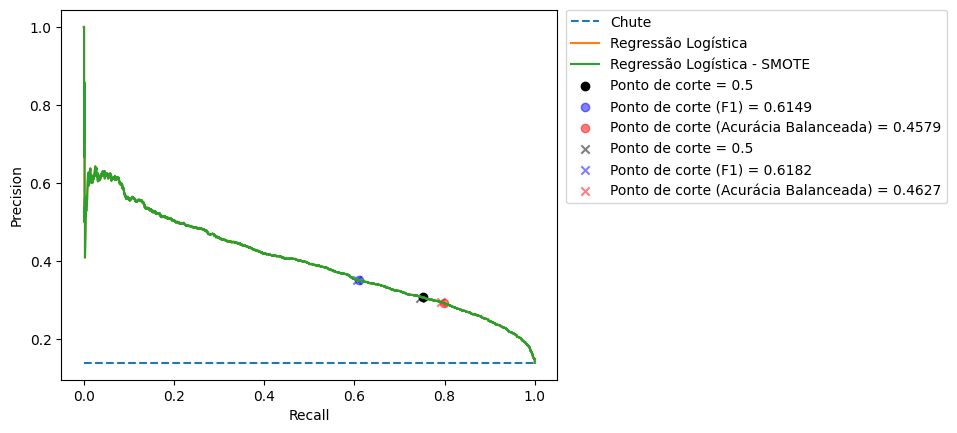

In [100]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1],
                                                      drop_intermediate=False)
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_pred_prob_smote[:, 1],
                                                      drop_intermediate=False)
# plot the roc curve for the model
ix=-1
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Chute')
plt.plot(recall, precision, label='Regressão Logística')
plt.plot(recall, precision, label='Regressão Logística - SMOTE')
plt.scatter(recall_padrao, precision_padrao, marker='o', color='black', label='Ponto de corte = 0.5')
plt.scatter(recall_f1, precision_f1, marker='o', color='blue', alpha=0.5,
            label=f'Ponto de corte (F1) = {cutoff_otimo_f1}')
plt.scatter(recall_acc_balan, precision_acc_balan, marker='o', color='red',alpha=0.5,
            label=f'Ponto de corte (Acurácia Balanceada) = {cutoff_otimo_balanced_accuracy}')
plt.scatter(recall_padrao_smote, precision_padrao_smote, marker='x', color='black',alpha=0.5,
            label='Ponto de corte = 0.5')
plt.scatter(recall_f1_smote, precision_f1_smote, marker='x', color='blue',alpha=0.5,
            label=f'Ponto de corte (F1) = {cutoff_otimo_f1_smote}')
plt.scatter(recall_acc_balan_smote, precision_acc_balan_smote, marker='x', color='red',alpha=0.5,
            label=f'Ponto de corte (Acurácia Balanceada) = {cutoff_otimo_balanced_accuracy_smote}')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.8, 1.02))
# show the plot
plt.show()

Acurácia Balanceada = 0.7386396648184033


<Axes: >

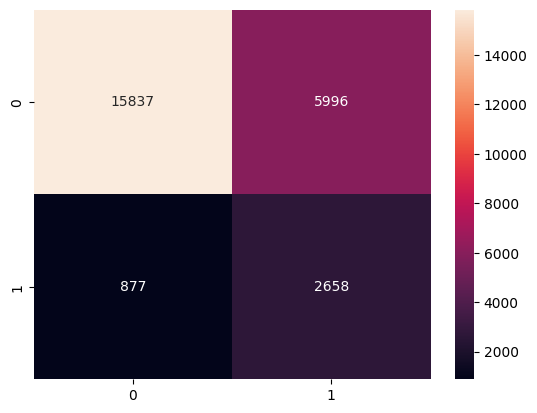

In [101]:
print(f"Acurácia Balanceada = {acuracia_balanceada}")
sns.heatmap(matriz_confusao, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 = 0.7132463665456914


<Axes: >

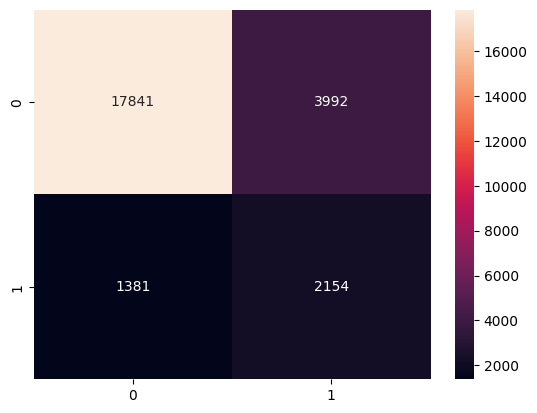

In [102]:
print(f"Acurácia Balanceada | Otimizado F1 = {acuracia_balanceada_f1}")
sns.heatmap(matriz_confusao_f1, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan = 0.7438939057190654


<Axes: >

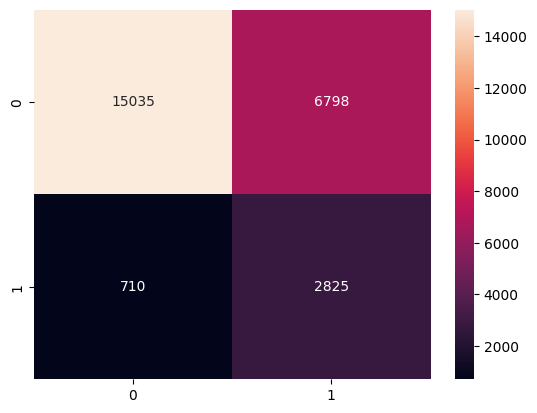

In [103]:
print(f"Acurácia Balanceada | Otimizado ACC Balan = {acuracia_balanceada_acc_balan}")
sns.heatmap(matriz_confusao_acc_balan, annot=True, fmt="d")

Acurácia Balanceada | SMOTE = 0.735565655223517


<Axes: >

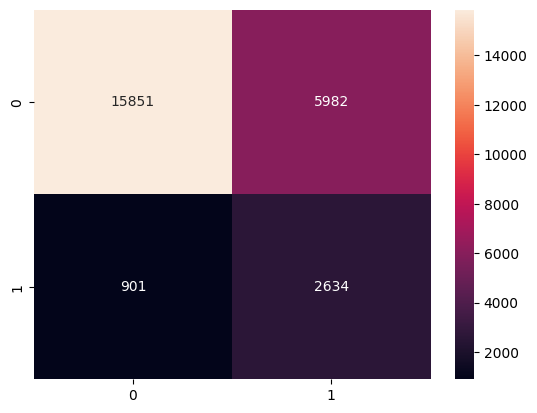

In [107]:
print(f"Acurácia Balanceada | SMOTE = {acuracia_balanceada_smote}")
sns.heatmap(matriz_confusao_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 | SMOTE = 0.7124987925898347


<Axes: >

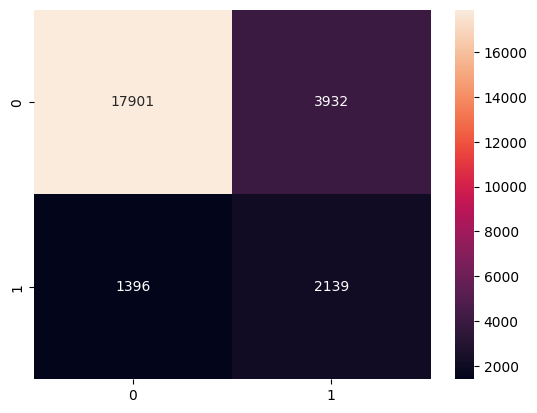

In [108]:
print(f"Acurácia Balanceada | Otimizado F1 | SMOTE = {acuracia_balanceada_f1_smote}")
sns.heatmap(matriz_confusao_f1_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan | SMOTE = 0.7427476256534187


<Axes: >

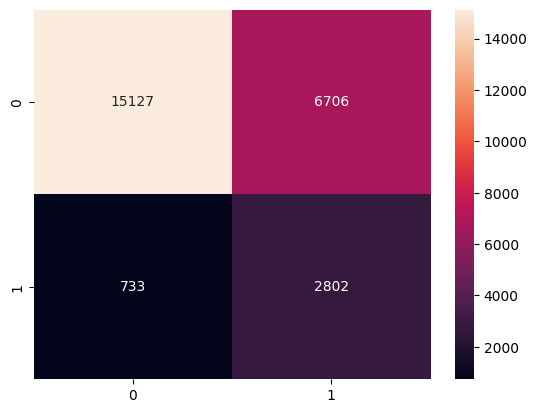

In [109]:
print(f"Acurácia Balanceada | Otimizado ACC Balan | SMOTE = {acuracia_balanceada_acc_balan_smote}")
sns.heatmap(matriz_confusao_acc_balan_smote, annot=True, fmt="d")

## Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
cutoff_otimo_f1 = cutoffs["f1"]["rf"]
cutoff_otimo_balanced_accuracy = cutoffs["balanced_accuracy"]["rf"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1} | acc balanceada -> {cutoff_otimo_balanced_accuracy}")

Pontos de corte: f1 -> 0.6163 | acc balanceada -> 0.48


In [116]:
clf = RandomForestClassifier(class_weight="balanced", max_depth=10, n_estimators=200, criterion="gini",
                             max_features="log2", n_jobs=8)

In [117]:
clf.fit(X, Y)
y_pred_prob = clf.predict_proba(X_test)

In [118]:
y_pred = to_labels(y_pred_prob, 0.5)[:, 1]
recall_padrao = recall_score(y_test, y_pred)
precision_padrao = precision_score(y_test, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

y_pred_f1 = to_labels(y_pred_prob, cutoff_otimo_f1)[:, 1]
recall_f1 = recall_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
acuracia_balanceada_f1 = balanced_accuracy_score(y_test, y_pred_f1)
matriz_confusao_f1 = confusion_matrix(y_test, y_pred_f1)

y_pred_acc_balan = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy)[:, 1]
recall_acc_balan = recall_score(y_test, y_pred_acc_balan)
precision_acc_balan = precision_score(y_test, y_pred_acc_balan)
acuracia_balanceada_acc_balan = balanced_accuracy_score(y_test, y_pred_acc_balan)
matriz_confusao_acc_balan = confusion_matrix(y_test, y_pred_acc_balan)

In [119]:
clf_smote = RandomForestClassifier(class_weight="balanced", max_depth=10, n_estimators=200, criterion="gini",
                             max_features="log2", n_jobs=8)
clf_smote.fit(X_smote, Y_smote)
y_pred_prob_smote = clf_smote.predict_proba(X_test)

In [120]:
cutoff_otimo_f1_smote = cutoffs["f1"]["rf_smote"]
cutoff_otimo_balanced_accuracy_smote = cutoffs["balanced_accuracy"]["rf_smote"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1_smote} | " +
        f"acc balanceada -> {cutoff_otimo_balanced_accuracy_smote}")

Pontos de corte: f1 -> 0.5333 | acc balanceada -> 0.402


In [121]:
y_pred_smote = to_labels(y_pred_prob_smote, 0.5)[:, 1]
recall_padrao_smote = recall_score(y_test, y_pred_smote)
precision_padrao_smote = precision_score(y_test, y_pred_smote)
acuracia_balanceada_smote = balanced_accuracy_score(y_test, y_pred_smote)
matriz_confusao_smote = confusion_matrix(y_test, y_pred_smote)

y_pred_f1_smote = to_labels(y_pred_prob, cutoff_otimo_f1_smote)[:, 1]
recall_f1_smote = recall_score(y_test, y_pred_f1_smote)
precision_f1_smote = precision_score(y_test, y_pred_f1_smote)
acuracia_balanceada_f1_smote = balanced_accuracy_score(y_test, y_pred_f1_smote)
matriz_confusao_f1_smote = confusion_matrix(y_test, y_pred_f1_smote)

y_pred_acc_balan_smote = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy_smote)[:, 1]
recall_acc_balan_smote = recall_score(y_test, y_pred_acc_balan_smote)
precision_acc_balan_smote = precision_score(y_test, y_pred_acc_balan_smote)
acuracia_balanceada_acc_balan_smote = balanced_accuracy_score(y_test, y_pred_acc_balan_smote)
matriz_confusao_acc_balan_smote = confusion_matrix(y_test, y_pred_acc_balan_smote)

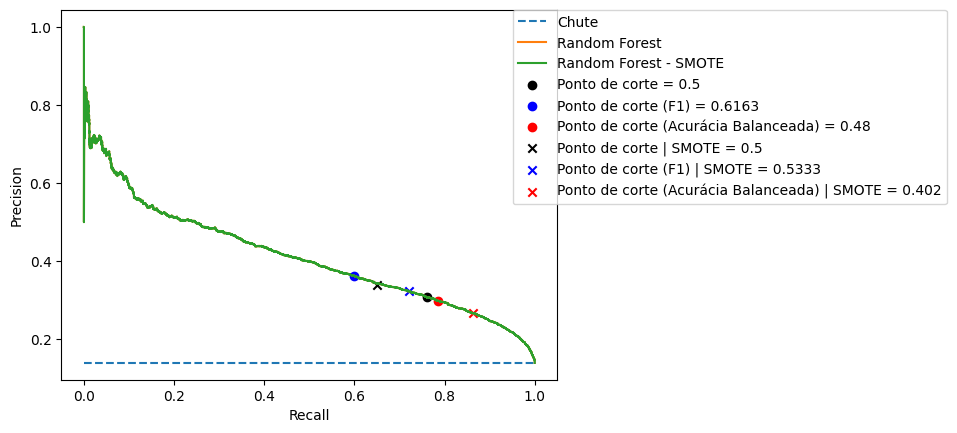

In [130]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1],
                                                      drop_intermediate=False)
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_pred_prob_smote[:, 1],
                                                      drop_intermediate=False)
# plot the roc curve for the model
ix=-1
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Chute')
plt.plot(recall, precision, label='Random Forest')
plt.plot(recall, precision, label='Random Forest - SMOTE')
plt.scatter(recall_padrao, precision_padrao, marker='o', color='black', label='Ponto de corte = 0.5')
plt.scatter(recall_f1, precision_f1, marker='o', color='blue',
            label=f'Ponto de corte (F1) = {cutoff_otimo_f1}')
plt.scatter(recall_acc_balan, precision_acc_balan, marker='o', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) = {cutoff_otimo_balanced_accuracy}')
plt.scatter(recall_padrao_smote, precision_padrao_smote, marker='x', color='black',
            label='Ponto de corte | SMOTE = 0.5')
plt.scatter(recall_f1_smote, precision_f1_smote, marker='x', color='blue',
            label=f'Ponto de corte (F1) | SMOTE = {cutoff_otimo_f1_smote}')
plt.scatter(recall_acc_balan_smote, precision_acc_balan_smote, marker='x', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) | SMOTE = {cutoff_otimo_balanced_accuracy_smote}')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.8, 1.02))
# show the plot
plt.show()

Acurácia Balanceada = 0.7416812954139274


<Axes: >

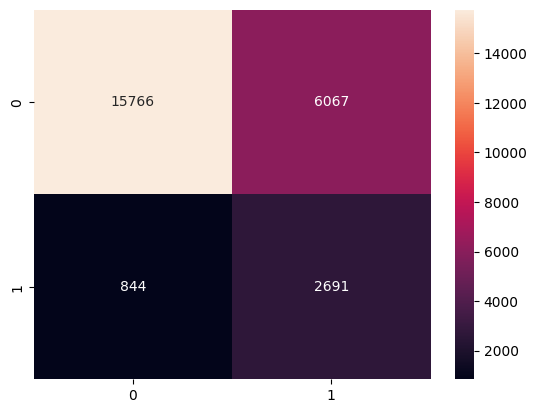

In [123]:
print(f"Acurácia Balanceada = {acuracia_balanceada}")
sns.heatmap(matriz_confusao, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 = 0.7142111156107137


<Axes: >

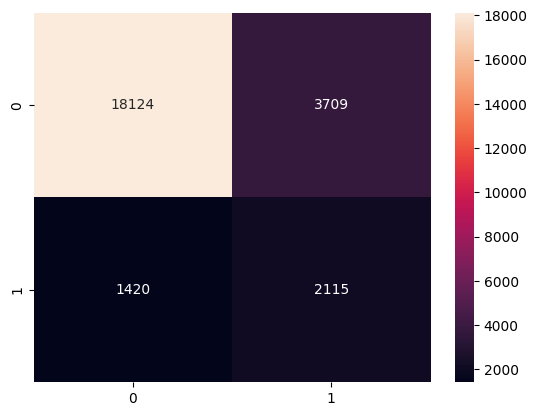

In [124]:
print(f"Acurácia Balanceada | Otimizado F1 = {acuracia_balanceada_f1}")
sns.heatmap(matriz_confusao_f1, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan = 0.7436045354180452


<Axes: >

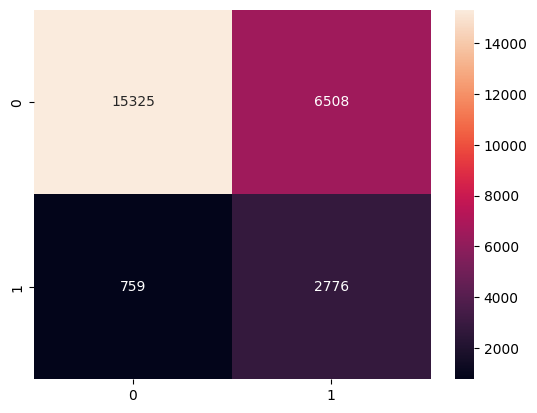

In [125]:
print(f"Acurácia Balanceada | Otimizado ACC Balan = {acuracia_balanceada_acc_balan}")
sns.heatmap(matriz_confusao_acc_balan, annot=True, fmt="d")

Acurácia Balanceada | SMOTE = 0.7222201563352415


<Axes: >

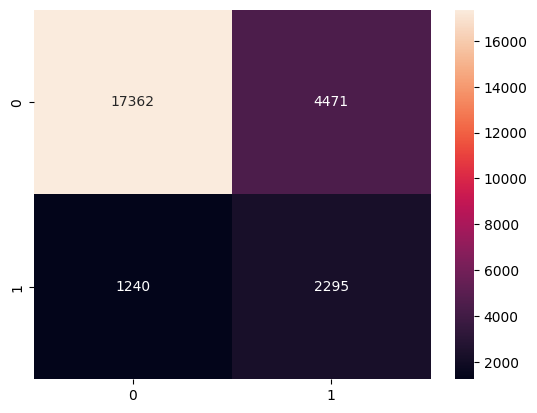

In [126]:
print(f"Acurácia Balanceada | SMOTE = {acuracia_balanceada_smote}")
sns.heatmap(matriz_confusao_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 | SMOTE = 0.7378939501608293


<Axes: >

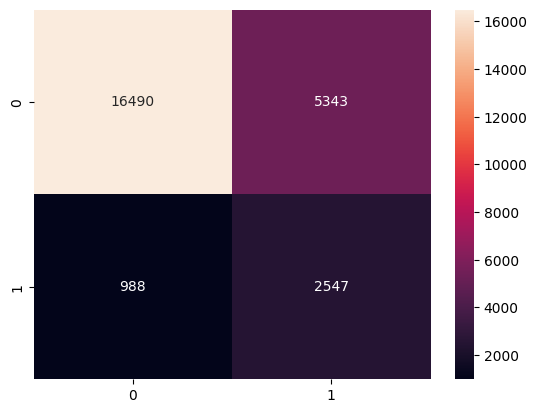

In [127]:
print(f"Acurácia Balanceada | Otimizado F1 | SMOTE = {acuracia_balanceada_f1_smote}")
sns.heatmap(matriz_confusao_f1_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan | SMOTE = 0.7392949540912045


<Axes: >

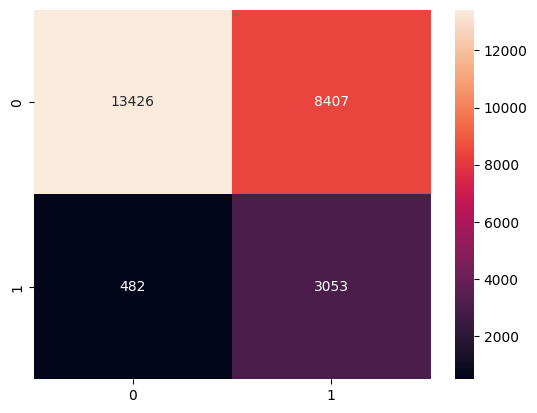

In [128]:
print(f"Acurácia Balanceada | Otimizado ACC Balan | SMOTE = {acuracia_balanceada_acc_balan_smote}")
sns.heatmap(matriz_confusao_acc_balan_smote, annot=True, fmt="d")

## Gradient Boosting Machines

In [131]:
from lightgbm import LGBMClassifier

In [132]:
cutoff_otimo_f1 = cutoffs["f1"]["lgbm"]
cutoff_otimo_balanced_accuracy = cutoffs["balanced_accuracy"]["lgbm"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1} | acc balanceada -> {cutoff_otimo_balanced_accuracy}")

Pontos de corte: f1 -> 0.6229 | acc balanceada -> 0.4472


In [133]:
clf = LGBMClassifier(class_weight="balanced", objective="binary", verbose=-1,
                     max_depth=20, n_estimators=200, num_leaves=150)

In [134]:
clf.fit(X, Y)
y_pred_prob = clf.predict_proba(X_test)

In [135]:
y_pred = to_labels(y_pred_prob, 0.5)[:, 1]
recall_padrao = recall_score(y_test, y_pred)
precision_padrao = precision_score(y_test, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

y_pred_f1 = to_labels(y_pred_prob, cutoff_otimo_f1)[:, 1]
recall_f1 = recall_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
acuracia_balanceada_f1 = balanced_accuracy_score(y_test, y_pred_f1)
matriz_confusao_f1 = confusion_matrix(y_test, y_pred_f1)

y_pred_acc_balan = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy)[:, 1]
recall_acc_balan = recall_score(y_test, y_pred_acc_balan)
precision_acc_balan = precision_score(y_test, y_pred_acc_balan)
acuracia_balanceada_acc_balan = balanced_accuracy_score(y_test, y_pred_acc_balan)
matriz_confusao_acc_balan = confusion_matrix(y_test, y_pred_acc_balan)

In [136]:
clf_smote = LGBMClassifier(class_weight="balanced", objective="binary", verbose=-1,
                     max_depth=20, n_estimators=200, num_leaves=150)
clf_smote.fit(X_smote, Y_smote)
y_pred_prob_smote = clf_smote.predict_proba(X_test)

In [137]:
cutoff_otimo_f1_smote = cutoffs["f1"]["lgbm_smote"]
cutoff_otimo_balanced_accuracy_smote = cutoffs["balanced_accuracy"]["lgbm_smote"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1_smote} | " +
        f"acc balanceada -> {cutoff_otimo_balanced_accuracy_smote}")

Pontos de corte: f1 -> 0.4637 | acc balanceada -> 0.2968


In [138]:
y_pred_smote = to_labels(y_pred_prob_smote, 0.5)[:, 1]
recall_padrao_smote = recall_score(y_test, y_pred_smote)
precision_padrao_smote = precision_score(y_test, y_pred_smote)
acuracia_balanceada_smote = balanced_accuracy_score(y_test, y_pred_smote)
matriz_confusao_smote = confusion_matrix(y_test, y_pred_smote)

y_pred_f1_smote = to_labels(y_pred_prob, cutoff_otimo_f1_smote)[:, 1]
recall_f1_smote = recall_score(y_test, y_pred_f1_smote)
precision_f1_smote = precision_score(y_test, y_pred_f1_smote)
acuracia_balanceada_f1_smote = balanced_accuracy_score(y_test, y_pred_f1_smote)
matriz_confusao_f1_smote = confusion_matrix(y_test, y_pred_f1_smote)

y_pred_acc_balan_smote = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy_smote)[:, 1]
recall_acc_balan_smote = recall_score(y_test, y_pred_acc_balan_smote)
precision_acc_balan_smote = precision_score(y_test, y_pred_acc_balan_smote)
acuracia_balanceada_acc_balan_smote = balanced_accuracy_score(y_test, y_pred_acc_balan_smote)
matriz_confusao_acc_balan_smote = confusion_matrix(y_test, y_pred_acc_balan_smote)

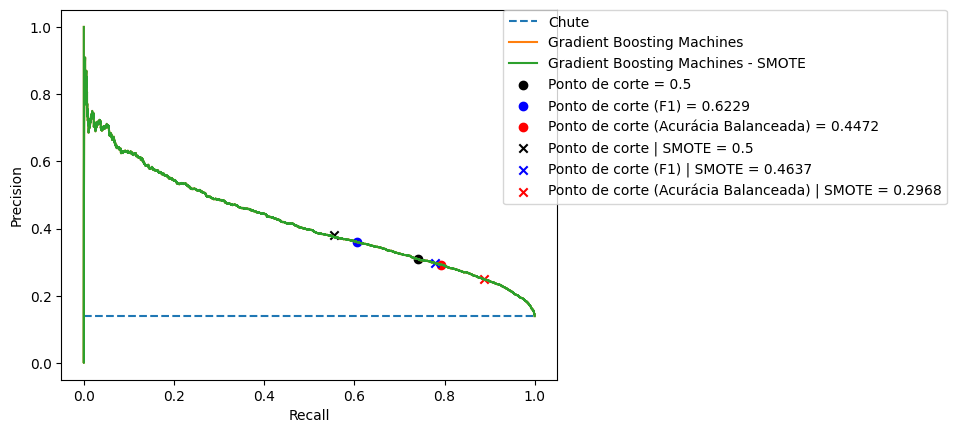

In [139]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1],
                                                      drop_intermediate=False)
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_pred_prob_smote[:, 1],
                                                      drop_intermediate=False)
# plot the roc curve for the model
ix=-1
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Chute')
plt.plot(recall, precision, label='Gradient Boosting Machines')
plt.plot(recall, precision, label='Gradient Boosting Machines - SMOTE')
plt.scatter(recall_padrao, precision_padrao, marker='o', color='black', label='Ponto de corte = 0.5')
plt.scatter(recall_f1, precision_f1, marker='o', color='blue',
            label=f'Ponto de corte (F1) = {cutoff_otimo_f1}')
plt.scatter(recall_acc_balan, precision_acc_balan, marker='o', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) = {cutoff_otimo_balanced_accuracy}')
plt.scatter(recall_padrao_smote, precision_padrao_smote, marker='x', color='black',
            label='Ponto de corte | SMOTE = 0.5')
plt.scatter(recall_f1_smote, precision_f1_smote, marker='x', color='blue',
            label=f'Ponto de corte (F1) | SMOTE = {cutoff_otimo_f1_smote}')
plt.scatter(recall_acc_balan_smote, precision_acc_balan_smote, marker='x', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) | SMOTE = {cutoff_otimo_balanced_accuracy_smote}')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.8, 1.02))
# show the plot
plt.show()

Acurácia Balanceada = 0.7365060066671716


<Axes: >

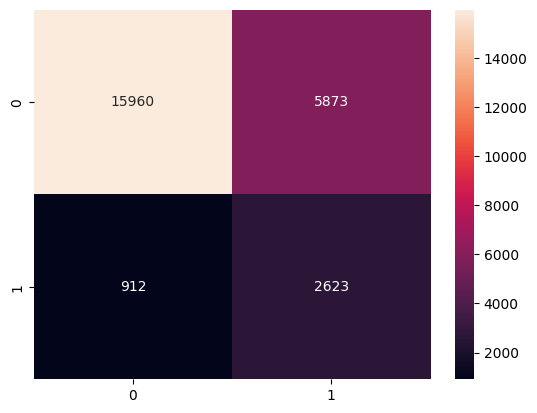

In [140]:
print(f"Acurácia Balanceada = {acuracia_balanceada}")
sns.heatmap(matriz_confusao, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 = 0.7155109465052675


<Axes: >

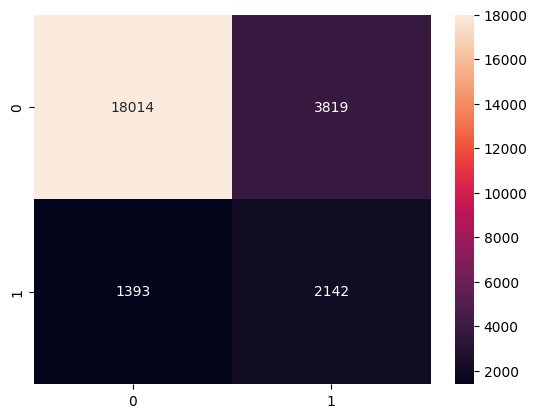

In [141]:
print(f"Acurácia Balanceada | Otimizado F1 = {acuracia_balanceada_f1}")
sns.heatmap(matriz_confusao_f1, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan = 0.7410152131413389


<Axes: >

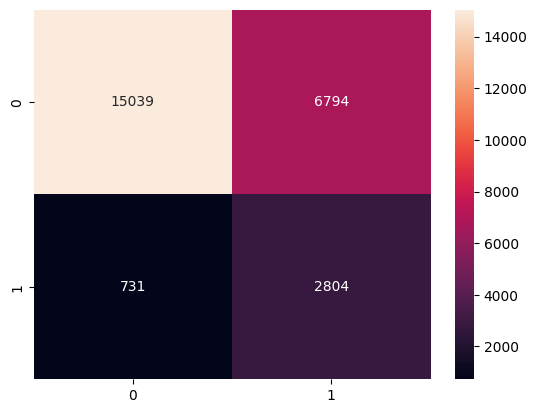

In [142]:
print(f"Acurácia Balanceada | Otimizado ACC Balan = {acuracia_balanceada_acc_balan}")
sns.heatmap(matriz_confusao_acc_balan, annot=True, fmt="d")

Acurácia Balanceada | SMOTE = 0.7040357656431608


<Axes: >

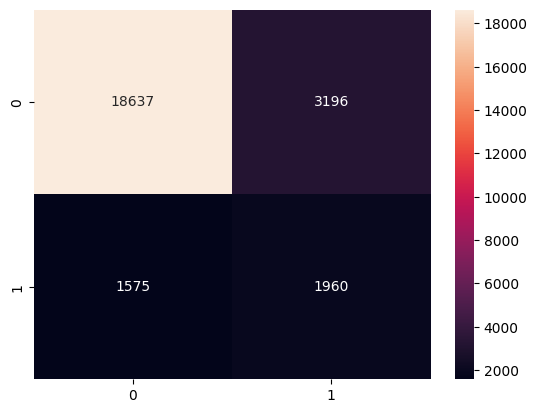

In [143]:
print(f"Acurácia Balanceada | SMOTE = {acuracia_balanceada_smote}")
sns.heatmap(matriz_confusao_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 | SMOTE = 0.7403850470697233


<Axes: >

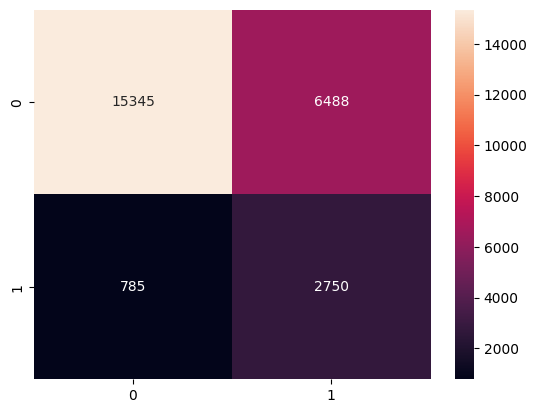

In [144]:
print(f"Acurácia Balanceada | Otimizado F1 | SMOTE = {acuracia_balanceada_f1_smote}")
sns.heatmap(matriz_confusao_f1_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan | SMOTE = 0.7272822092817077


<Axes: >

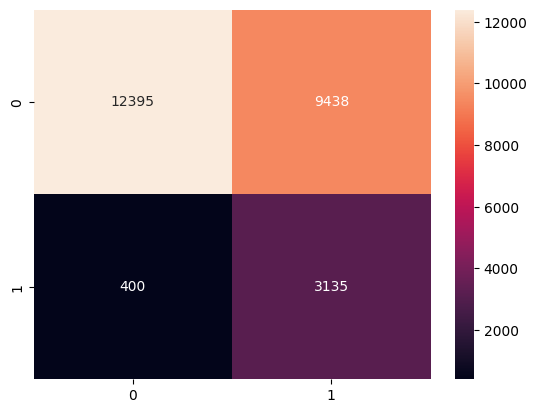

In [145]:
print(f"Acurácia Balanceada | Otimizado ACC Balan | SMOTE = {acuracia_balanceada_acc_balan_smote}")
sns.heatmap(matriz_confusao_acc_balan_smote, annot=True, fmt="d")

## Stacking

In [146]:
from sklearn.ensemble import StackingClassifier

In [147]:
cutoff_otimo_f1 = cutoffs["f1"]["stacking"]
cutoff_otimo_balanced_accuracy = cutoffs["balanced_accuracy"]["stacking"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1} | acc balanceada -> {cutoff_otimo_balanced_accuracy}")

Pontos de corte: f1 -> 0.6678 | acc balanceada -> 0.472


In [149]:
estimators = [
    ('rf', RandomForestClassifier(class_weight="balanced", max_depth=10, n_estimators=200,
                                  criterion="gini", max_features="log2", n_jobs=8)),
    ('svr', LGBMClassifier(class_weight="balanced", objective="binary",
                           verbose=-1, max_depth=20, n_estimators=200, num_leaves=150))
                ]
final_estimator = LogisticRegression(class_weight="balanced", max_iter=100000,
                                     solver='saga', C=1, penalty='l1', n_jobs=8)
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, passthrough=True)

In [150]:
clf.fit(X, Y)
y_pred_prob = clf.predict_proba(X_test)

In [151]:
y_pred = to_labels(y_pred_prob, 0.5)[:, 1]
recall_padrao = recall_score(y_test, y_pred)
precision_padrao = precision_score(y_test, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)

y_pred_f1 = to_labels(y_pred_prob, cutoff_otimo_f1)[:, 1]
recall_f1 = recall_score(y_test, y_pred_f1)
precision_f1 = precision_score(y_test, y_pred_f1)
acuracia_balanceada_f1 = balanced_accuracy_score(y_test, y_pred_f1)
matriz_confusao_f1 = confusion_matrix(y_test, y_pred_f1)

y_pred_acc_balan = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy)[:, 1]
recall_acc_balan = recall_score(y_test, y_pred_acc_balan)
precision_acc_balan = precision_score(y_test, y_pred_acc_balan)
acuracia_balanceada_acc_balan = balanced_accuracy_score(y_test, y_pred_acc_balan)
matriz_confusao_acc_balan = confusion_matrix(y_test, y_pred_acc_balan)

In [152]:
estimators = [
    ('rf', RandomForestClassifier(class_weight="balanced", max_depth=10, n_estimators=200,
                                  criterion="gini", max_features="log2", n_jobs=8)),
    ('svr', LGBMClassifier(class_weight="balanced", objective="binary",
                           verbose=-1, max_depth=20, n_estimators=200, num_leaves=150))
                ]
final_estimator = LogisticRegression(class_weight="balanced", max_iter=100000,
                                     solver='saga', C=1, penalty='l1', n_jobs=8)
clf_smote = StackingClassifier(estimators=estimators, final_estimator=final_estimator, passthrough=True)
clf_smote.fit(X_smote, Y_smote)
y_pred_prob_smote = clf_smote.predict_proba(X_test)

In [153]:
cutoff_otimo_f1_smote = cutoffs["f1"]["stacking_smote"]
cutoff_otimo_balanced_accuracy_smote = cutoffs["balanced_accuracy"]["stacking_smote"]
print(f"Pontos de corte: f1 -> {cutoff_otimo_f1_smote} | " +
        f"acc balanceada -> {cutoff_otimo_balanced_accuracy_smote}")

Pontos de corte: f1 -> 0.5564 | acc balanceada -> 0.3216


In [154]:
y_pred_smote = to_labels(y_pred_prob_smote, 0.5)[:, 1]
recall_padrao_smote = recall_score(y_test, y_pred_smote)
precision_padrao_smote = precision_score(y_test, y_pred_smote)
acuracia_balanceada_smote = balanced_accuracy_score(y_test, y_pred_smote)
matriz_confusao_smote = confusion_matrix(y_test, y_pred_smote)

y_pred_f1_smote = to_labels(y_pred_prob, cutoff_otimo_f1_smote)[:, 1]
recall_f1_smote = recall_score(y_test, y_pred_f1_smote)
precision_f1_smote = precision_score(y_test, y_pred_f1_smote)
acuracia_balanceada_f1_smote = balanced_accuracy_score(y_test, y_pred_f1_smote)
matriz_confusao_f1_smote = confusion_matrix(y_test, y_pred_f1_smote)

y_pred_acc_balan_smote = to_labels(y_pred_prob, cutoff_otimo_balanced_accuracy_smote)[:, 1]
recall_acc_balan_smote = recall_score(y_test, y_pred_acc_balan_smote)
precision_acc_balan_smote = precision_score(y_test, y_pred_acc_balan_smote)
acuracia_balanceada_acc_balan_smote = balanced_accuracy_score(y_test, y_pred_acc_balan_smote)
matriz_confusao_acc_balan_smote = confusion_matrix(y_test, y_pred_acc_balan_smote)

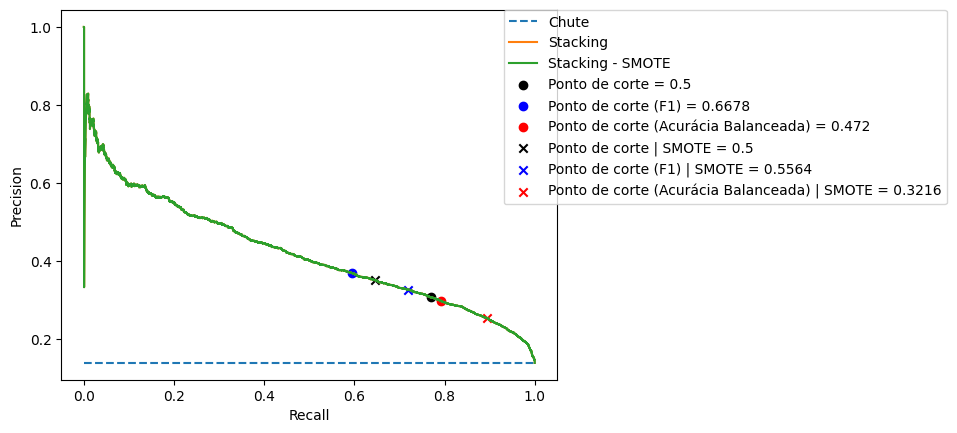

In [155]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1],
                                                      drop_intermediate=False)
precision_smote, recall_smote, thresholds_smote = precision_recall_curve(y_test, y_pred_prob_smote[:, 1],
                                                      drop_intermediate=False)
# plot the roc curve for the model
ix=-1
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Chute')
plt.plot(recall, precision, label='Stacking')
plt.plot(recall, precision, label='Stacking - SMOTE')
plt.scatter(recall_padrao, precision_padrao, marker='o', color='black', label='Ponto de corte = 0.5')
plt.scatter(recall_f1, precision_f1, marker='o', color='blue',
            label=f'Ponto de corte (F1) = {cutoff_otimo_f1}')
plt.scatter(recall_acc_balan, precision_acc_balan, marker='o', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) = {cutoff_otimo_balanced_accuracy}')
plt.scatter(recall_padrao_smote, precision_padrao_smote, marker='x', color='black',
            label='Ponto de corte | SMOTE = 0.5')
plt.scatter(recall_f1_smote, precision_f1_smote, marker='x', color='blue',
            label=f'Ponto de corte (F1) | SMOTE = {cutoff_otimo_f1_smote}')
plt.scatter(recall_acc_balan_smote, precision_acc_balan_smote, marker='x', color='red',
            label=f'Ponto de corte (Acurácia Balanceada) | SMOTE = {cutoff_otimo_balanced_accuracy_smote}')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.8, 1.02))
# show the plot
plt.show()

Acurácia Balanceada = 0.7447646921977042


<Axes: >

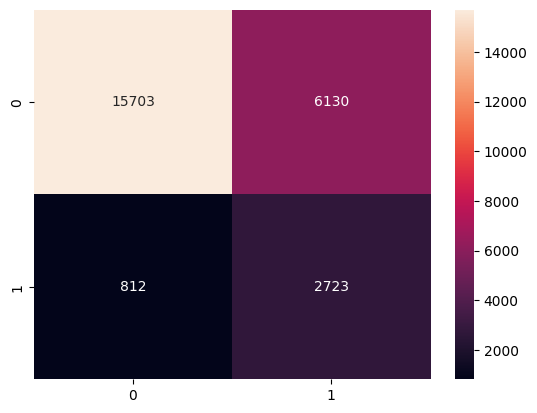

In [156]:
print(f"Acurácia Balanceada = {acuracia_balanceada}")
sns.heatmap(matriz_confusao, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 = 0.7150167813007198


<Axes: >

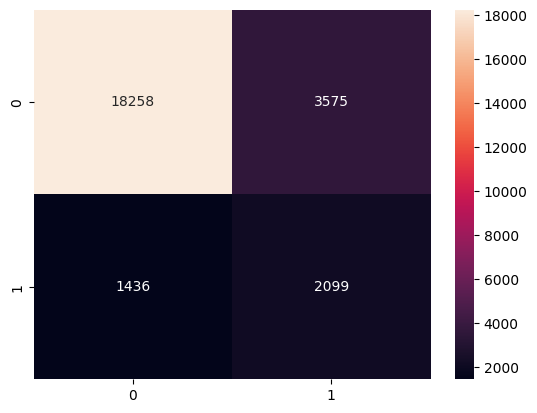

In [157]:
print(f"Acurácia Balanceada | Otimizado F1 = {acuracia_balanceada_f1}")
sns.heatmap(matriz_confusao_f1, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan = 0.7452775410825561


<Axes: >

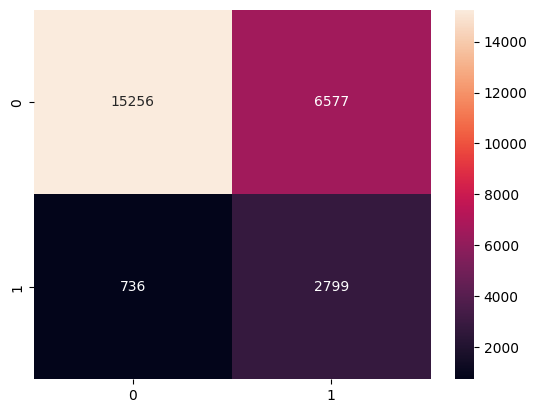

In [158]:
print(f"Acurácia Balanceada | Otimizado ACC Balan = {acuracia_balanceada_acc_balan}")
sns.heatmap(matriz_confusao_acc_balan, annot=True, fmt="d")

Acurácia Balanceada | SMOTE = 0.7260986072041913


<Axes: >

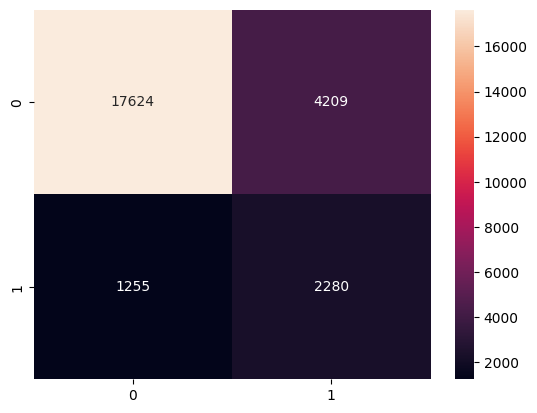

In [159]:
print(f"Acurácia Balanceada | SMOTE = {acuracia_balanceada_smote}")
sns.heatmap(matriz_confusao_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado F1 | SMOTE = 0.7398473017273788


<Axes: >

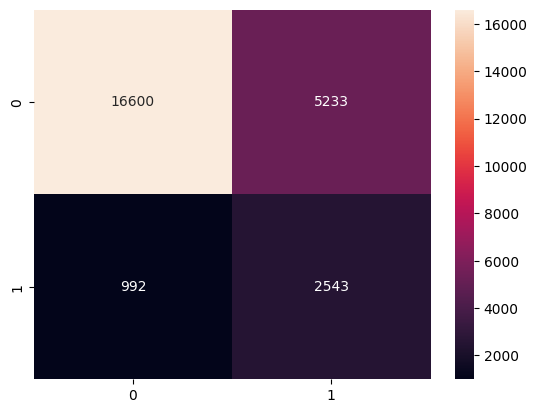

In [160]:
print(f"Acurácia Balanceada | Otimizado F1 | SMOTE = {acuracia_balanceada_f1_smote}")
sns.heatmap(matriz_confusao_f1_smote, annot=True, fmt="d")

Acurácia Balanceada | Otimizado ACC Balan | SMOTE = 0.7350011087766588


<Axes: >

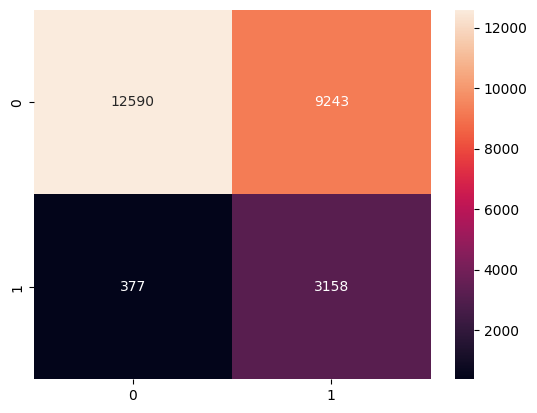

In [161]:
print(f"Acurácia Balanceada | Otimizado ACC Balan | SMOTE = {acuracia_balanceada_acc_balan_smote}")
sns.heatmap(matriz_confusao_acc_balan_smote, annot=True, fmt="d")